In [33]:
import datetime

import numpy as np
import pandas as pd

In [5]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.set_index('REPORTED_DATE', inplace=True)
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


# 通过行索引进行切片

In [9]:
crime.loc['2014-06-29 02:18:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0


In [10]:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [14]:
crime.loc['2015-3-4' : '2016-1-1'].shape

(75403, 7)

# 用`between_time`筛选数据

In [18]:
crime.between_time(start_time='2:00', end_time='5:00', include_end=True).shape

(29229, 7)

In [19]:
crime.between_time(start_time='2:00', end_time='5:00', include_end=False).shape

(29078, 7)

In [35]:
crime.between_time(start_time=datetime.time(2, 0), end_time=datetime.time(5, 0)).shape

(29229, 7)

# 用`at_time`方法选取特定时间

In [20]:
crime.at_time('5:47').shape

(118, 7)

In [21]:
crime['5:47'].shape

KeyError: '5:47'

# 用`first`方法可以选取排在前面的n个时间

> 使用行索引中的第一个值作为起点，加上偏移量

In [25]:
crime_sort = crime.sort_index()

In [28]:
crime_sort.first('2H')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [30]:
# 前7周的数据

crime_sort.first('7W').shape

(6708, 7)

In [32]:
# 前5个工作日的数据

crime_sort.first('5B').shape

(879, 7)

# 时间偏移量

In [36]:
first_date = crime_sort.index[0]
first_date

Timestamp('2012-01-02 00:06:00')

In [37]:
first_date + pd.offsets.MonthBegin(6)

Timestamp('2012-07-01 00:06:00')

In [39]:
first_date + pd.offsets.MonthEnd(6)

Timestamp('2012-06-30 00:06:00')

> Parameters that **add** to the offset (like Timedelta):
> - years
> - months
> - weeks
> - days
> - hours
> - minutes
> - seconds
> - microseconds
> - nanoseconds

In [40]:
first_date + pd.DateOffset(months=1)

Timestamp('2012-02-02 00:06:00')

In [44]:
first_date + pd.DateOffset(years=2, months=2, days=3, hours=2, seconds=10)

Timestamp('2014-03-05 02:06:10')

# 重采样

> resample方法可以用`DateOffset`对象或别名，即可以在所有返回的对象分组上操作

In [49]:
# 按周统计数据

print(crime_sort.resample('W'))

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]


In [50]:
# size()可以查看每个分组的大小

crime_sort.resample('W').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
              ... 
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [51]:
# len()也可以查看大小

len(crime_sort.loc[: '2012-01-08'])

877

In [52]:
len(crime_sort.loc['2012-1-9' : '2012-1-15'])

1071

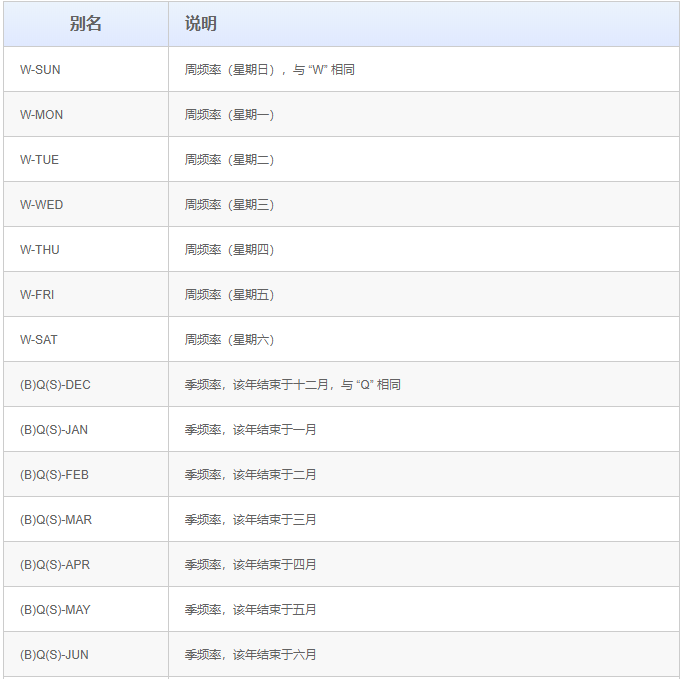

In [53]:
# 用周四作为每周的结束

crime_sort.resample('W-THU').size()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
              ... 
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [55]:
# 用 groupby 方法实现相同功能

crime_sort.groupby(pd.Grouper(freq='W-THU')).size()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
              ... 
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [56]:
# resample 对象支持的所有方法

r = crime_sort.resample('W')
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groups',
 'indices',
 'interpolate',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'obj',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

In [64]:
# 按季度分组（Q -> 季末频率）

crime_sort.resample('Q').sum()

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
...,...,...,...,...
2017-03-31,-2.288383e+06,866234.222733,16426,5587
2017-06-30,-2.453857e+06,928864.661232,17486,6148
2017-09-30,-2.508001e+06,949396.372035,17990,6101


In [65]:
# 按季度分组（Q -> 季末频率）, 提取指定列数据

crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
...,...,...
2017-03-31,16426,5587
2017-06-30,17486,6148
2017-09-30,17990,6101


In [66]:
# 按季度分组（QS -> 季初频率）, 时间索引为每个季度的第一天

crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
...,...,...
2017-01-01,16426,5587
2017-04-01,17486,6148
2017-07-01,17990,6101


In [67]:
# 通过切片实现相同功能

crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [71]:
# 通过 groupby 实现相同功能

crime_sort.groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']].sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
...,...,...
2017-01-01,16426,5587
2017-04-01,17486,6148
2017-07-01,17990,6101


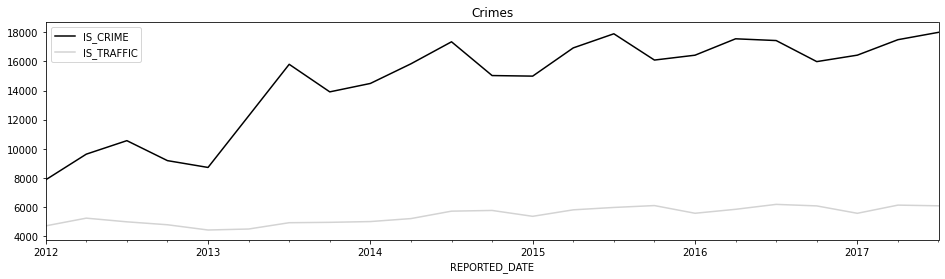

In [72]:
# 绘图

plot_kwargs = dict(figsize=(16, 4), color=['black', 'lightgray'], title='Crimes')
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().plot(**plot_kwargs)

In [85]:
# 统计季度增长率 (计算方法：所有数据除以第一行的数据，并减1，得到的就是相对第一行数据的增长率)

## 按季度分组
crime_quarterly = crime_sort.resample('Q')['IS_CRIME','IS_TRAFFIC'].sum()
## 提取第一行数据
crime_begin = crime_quarterly.iloc[0]
## 计算增长率
crime_quarterly.div(crime_begin).sub(1).round(2)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,0.00,0.00
2012-06-30,0.22,0.11
2012-09-30,0.34,0.06
...,...,...
2017-03-31,1.08,0.18
2017-06-30,1.22,0.30
2017-09-30,1.28,0.29


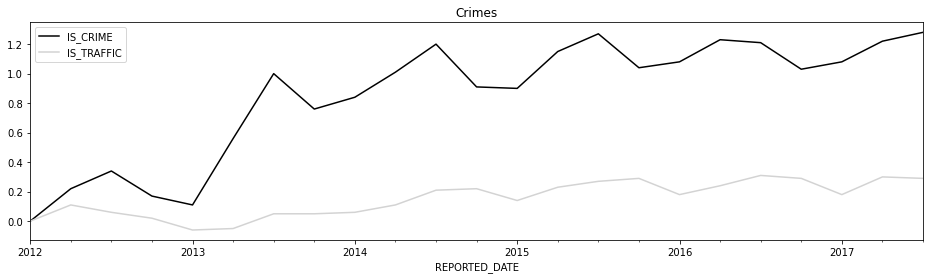

In [86]:
crime_quarterly.div(crime_begin).sub(1).round(2).plot(**plot_kwargs)

In [131]:
# 按星期统计

crime_sort.index.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

In [113]:
# 按星期统计 （注： DatetimeIndex没有dt属性，所以index要先转换成series后才能访问dt属性）

week_counts = crime_sort.index.to_series().dt.day_name().value_counts()
week_counts

Monday       70024
Friday       69621
Wednesday    69538
             ...  
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, Length: 7, dtype: int64

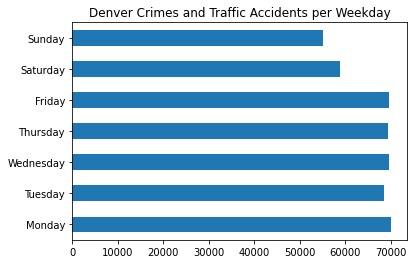

In [114]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'

week_counts.reindex(days).plot(kind='barh', title=title)

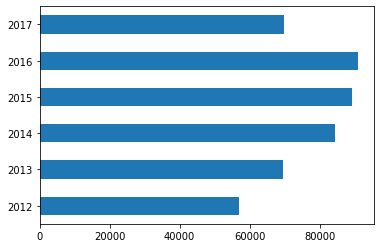

In [129]:
# 按年统计

crime_sort.index.year.value_counts().sort_index().plot(kind='barh')

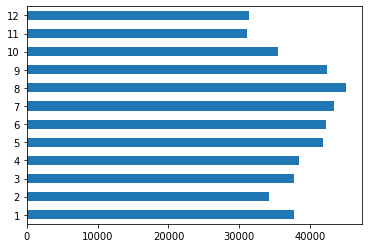

In [130]:
# 按年统计

crime_sort.index.month.value_counts().sort_index().plot(kind='barh')

In [126]:
# 按年和星期分组聚合

_weekday = crime.index.day_name()
_year = crime.index.year
crime.groupby([_year, _weekday]).size()

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
                                ...  
2017           Thursday         10545
               Tuesday          10628
               Wednesday        10576
Length: 42, dtype: int64

In [127]:
# 重命名索引名 

crime.groupby([_year, _weekday]).size().rename_axis(['Year', 'Weekday'])

Year  Weekday  
2012  Friday        8549
      Monday        8786
      Saturday      7442
                   ...  
2017  Thursday     10545
      Tuesday      10628
      Wednesday    10576
Length: 42, dtype: int64

In [128]:
# 对表格进行重排 （unstack针对索引进行操作，pivot针对值进行操作）
 
crime.groupby([_year, _weekday]).size().rename_axis(['Year', 'Weekday']).unstack('Weekday')

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [122]:
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
[attr for attr in common_attrs if attr[0] != '_']

['weekday',
 'daysinmonth',
 'hour',
 'is_year_start',
 'dayofweek',
 'tz_localize',
 'tz_convert',
 'is_quarter_end',
 'microsecond',
 'quarter',
 'day',
 'to_period',
 'second',
 'max',
 'is_month_end',
 'is_leap_year',
 'timetz',
 'tz',
 'ceil',
 'month',
 'month_name',
 'to_julian_date',
 'week',
 'day_name',
 'year',
 'is_quarter_start',
 'freq',
 'to_numpy',
 'strftime',
 'to_pydatetime',
 'dayofyear',
 'freqstr',
 'resolution',
 'floor',
 'days_in_month',
 'round',
 'min',
 'is_year_end',
 'normalize',
 'minute',
 'date',
 'nanosecond',
 'time',
 'tzinfo',
 'weekofyear',
 'is_month_start']

In [134]:
# groupby 可以接收函数作为参数

crime_sort.groupby(lambda x: x.day_name())[['IS_CRIME', 'IS_TRAFFIC']].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
...,...,...
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [141]:
# groupby 支持函数列表

### 用年份和小时(2小时)分组
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_final = crime_sort.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']].sum().unstack()
cr_final

IS_CRIME                               IS_TRAFFIC                          \
       2012  2013  2014  2015  2016  2017       2012  2013  2014  2015  2016   
0      2422  4040  5649  5649  5377  3811        919   792   978  1136   980   
2      1888  3214  4245  4050  4091  3041        718   652   779   773   718   
4      1472  2181  2956  2959  3044  2255        399   378   424   471   464   
..      ...   ...   ...   ...   ...   ...        ...   ...   ...   ...   ...   
18     3660  5094  6586  7015  7407  6157       3118  2704  3217  3412  3608   
20     3521  4895  6130  6360  6963  5272       1787  1806  1994  2071  2184   
22     3078  4318  5496  5626  5637  4358       1343  1330  1532  1671  1472   

          
    2017  
0    782  
2    537  
4    313  
..   ...  
18  2718  
20  1491  
22  1072  

[12 rows x 12 columns]

In [139]:
# 对每列的最大值着色

cr_final.style.highlight_max(color='red')

In [145]:
# xs方法可以从任意索引层选出一个唯一值

### 由于'IS_TRAFFIC'是列标签，所以axis='columns'; 由于是多层索引中的第一层，所以level=0
cr_final.xs(key='IS_TRAFFIC', axis='columns', level=0)

,2012,2013,2014,2015,2016,2017
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
...,...,...,...,...,...,...
18,3118,2704,3217,3412,3608,2718
20,1787,1806,1994,2071,2184,1491
22,1343,1330,1532,1671,1472,1072


In [146]:
### 由于'2016'是列标签，所以axis='columns'; 由于是多层索引中的第二层，所以level=1

cr_final.xs(2016, axis='columns', level=1)

,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
...,...,...
18,7407,3608
20,6963,2184
22,5637,1472


In [153]:
### 由于'4'是索引，所以axis='index'; 由于是单层索引，所以level取默认值

cr_final.xs(4, axis='index').unstack()

,2012,2013,2014,2015,2016,2017
IS_CRIME,1472,2181,2956,2959,3044,2255
IS_TRAFFIC,399,378,424,471,464,313


In [154]:
cr_final.xs(4, axis='index').unstack(level=0)

,IS_CRIME,IS_TRAFFIC
2012,1472,399
2013,2181,378
2014,2956,424
2015,2959,471
2016,3044,464
2017,2255,313


# 用时间戳和另一列分组

In [156]:
employee = pd.read_csv('data/employee.csv', parse_dates=['JOB_DATE', 'HIRE_DATE'],
                      index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [159]:
# 对性别进行分组，查看二者的平均工资

employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [160]:
employee.groupby('GENDER').mean()

,UNIQUE_ID,BASE_SALARY
GENDER,,
Female,1010.341625,52168.339688
Male,994.820329,57354.611917


In [161]:
# 根据聘用日期，每10年分一组，查看工资情况

employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [184]:
# 根据日期和性别同时分组

sal_final = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY'].mean()
sal_final = sal_final.round(-2).unstack(level=0)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [185]:
# groupby返回对象包含resample方法，但相反却不成立

'resample' in dir(employee.groupby('GENDER'))

True

In [186]:
'groupby' in dir(employee.resample('10AS'))

False

In [187]:
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [189]:
# 手工创造时间区间

_sal_final = sal_final.copy()

years = _sal_final.index.year
years_right = years + 9
_sal_final.index = years.astype(str) + '-' + years_right.astype(str)
_sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [190]:
# 用cut函数创造基于每名员工受聘年份的等宽间隔

cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

<IntervalArray>
[(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]]
Length: 5, closed: right, dtype: interval[float64]

In [193]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().round(-2)

                  GENDER
(1958.0, 1970.0]  Female        NaN
                  Male      85400.0
(1970.0, 1981.0]  Female    54400.0
                             ...   
(1993.0, 2004.0]  Male      62300.0
(2004.0, 2016.0]  Female    49100.0
                  Male      49800.0
Name: BASE_SALARY, Length: 10, dtype: float64

In [194]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY'].mean().unstack('GENDER').round(-2)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


In [196]:
crime_sort

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
...,...,...,...,...,...,...,...
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0
2017-09-29 04:12:00,drug-pcs-other-drug,drug-alcohol,-105.048416,39.726209,villa-park,1,0
2017-09-29 06:16:00,theft-of-motor-vehicle,auto-theft,-104.890269,39.657222,hampden,1,0


In [201]:
# 按月统计犯罪数量

all_data = crime_sort.groupby([pd.Grouper(freq='M'), 'OFFENSE_CATEGORY_ID']).size()
all_data

REPORTED_DATE  OFFENSE_CATEGORY_ID     
2012-01-31     aggravated-assault           113
               all-other-crimes             124
               arson                          5
                                           ... 
2017-09-30     theft-from-motor-vehicle     496
               traffic-accident            1926
               white-collar-crime           125
Length: 1035, dtype: int64

In [202]:
all_data.unstack('OFFENSE_CATEGORY_ID')

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,traffic-accident,white-collar-crime
REPORTED_DATE,,,,,,,,,,,,,,,
2012-01-31,113,124,5,275,343,106,381,0,130,434,123,22,558,1569,46
2012-02-29,94,150,4,220,266,127,396,4,97,405,64,28,437,1624,61
2012-03-31,147,158,11,236,357,127,470,4,120,526,104,42,481,1526,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31,245,1448,14,477,363,446,782,12,427,848,123,68,628,2032,124
2017-08-31,195,1583,7,599,432,636,877,7,376,878,108,57,675,2126,138
2017-09-30,200,1249,8,538,361,503,748,3,361,671,101,53,496,1926,125


In [206]:
all_data.sort_values()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     murder                    0
2016-12-31     murder                    1
2016-05-31     murder                    1
                                      ... 
2016-10-31     traffic-accident       2156
2015-10-31     traffic-accident       2156
2017-05-31     traffic-accident       2199
Length: 1035, dtype: int64

In [207]:
all_data.sort_values().reset_index()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,0
0,2012-01-31,murder,0
1,2016-12-31,murder,1
2,2016-05-31,murder,1
...,...,...,...
1032,2016-10-31,traffic-accident,2156
1033,2015-10-31,traffic-accident,2156
1034,2017-05-31,traffic-accident,2199


In [208]:
all_data.sort_values().reset_index(name='Total')

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2012-01-31,murder,0
1,2016-12-31,murder,1
2,2016-05-31,murder,1
...,...,...,...
1032,2016-10-31,traffic-accident,2156
1033,2015-10-31,traffic-accident,2156
1034,2017-05-31,traffic-accident,2199


In [216]:
crime_sort.index.resolution

'minute'

In [215]:
crime_sort.index

DatetimeIndex(['2012-01-02 00:06:00', '2012-01-02 00:06:00',
               '2012-01-02 00:16:00', '2012-01-02 00:47:00',
               '2012-01-02 01:35:00', '2012-01-02 02:39:00',
               '2012-01-02 03:30:00', '2012-01-02 04:07:00',
               '2012-01-02 04:46:00', '2012-01-02 06:52:00',
               ...
               '2017-09-29 03:05:00', '2017-09-29 03:20:00',
               '2017-09-29 03:23:00', '2017-09-29 03:47:00',
               '2017-09-29 03:54:00', '2017-09-29 03:58:00',
               '2017-09-29 03:58:00', '2017-09-29 04:12:00',
               '2017-09-29 04:12:00', '2017-09-29 06:16:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', length=460911, freq=None)

In [217]:
crime_sort.index.to_period('M')

PeriodIndex(['2012-01', '2012-01', '2012-01', '2012-01', '2012-01', '2012-01',
             '2012-01', '2012-01', '2012-01', '2012-01',
             ...
             '2017-09', '2017-09', '2017-09', '2017-09', '2017-09', '2017-09',
             '2017-09', '2017-09', '2017-09', '2017-09'],
            dtype='period[M]', name='REPORTED_DATE', length=460911, freq='M')

In [220]:
crime_sort.groupby([lambda x: x.to_period('M'), 'OFFENSE_CATEGORY_ID']).size().unstack()

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,traffic-accident,white-collar-crime
2012-01,113,124,5,275,343,106,381,0,130,434,123,22,558,1569,46
2012-02,94,150,4,220,266,127,396,4,97,405,64,28,437,1624,61
2012-03,147,158,11,236,357,127,470,4,120,526,104,42,481,1526,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07,245,1448,14,477,363,446,782,12,427,848,123,68,628,2032,124
2017-08,195,1583,7,599,432,636,877,7,376,878,108,57,675,2126,138
2017-09,200,1249,8,538,361,503,748,3,361,671,101,53,496,1926,125


In [57]:
# 通过resample方法的`on`参数指定分组列
# For a DataFrame, column to use instead of index for resampling. Column must be datetime-like

_crime = pd.read_hdf('data/crime.h5', 'crime')
_crime.resample('W', on='REPORTED_DATE').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
              ... 
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [61]:
# 通过 pd.Grouper 参数`key`设为 Timestamp 来进行分组

_crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
              ... 
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

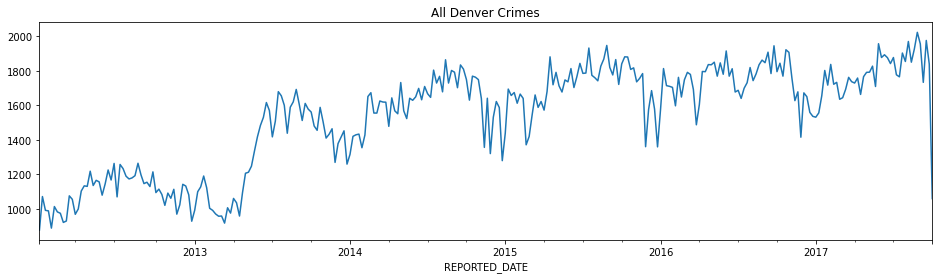

In [62]:
# 绘图

_crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size().plot(
    figsize=(16, 4), title='All Denver Crimes'
)